<a href="https://colab.research.google.com/github/AmnaShaheena/MachineLearning_LinearRegression/blob/main/PolynomialRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Generate dataset

In [1]:
import numpy as np

np.random.seed(0)
x=1+2*np.random.normal(0,1,1000)
y=x+1.5*(x**2)+0.8*(x**3)+np.random.normal(0,3,1000)

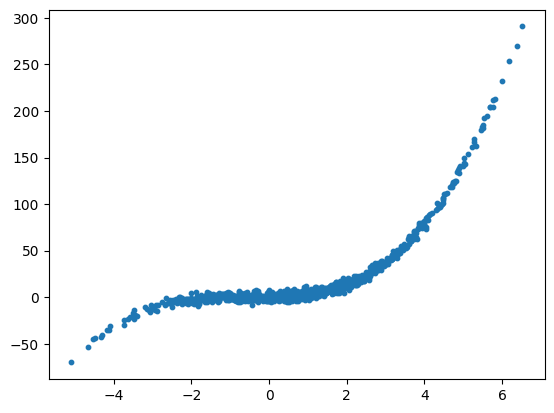

In [2]:
import matplotlib.pyplot as plt
plt.scatter(x,y,s=10)
plt.show()

Split the Dataset into 3 sets

In [3]:
from sklearn.model_selection import train_test_split
x=x[:,np.newaxis]
y=y[:,np.newaxis]

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.3,random_state=1)

**Train a Simple Linear Regression Model**

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg_1=LinearRegression()
lin_reg_1.fit(X_train,y_train)
print("Degree 1 - Training Error : ",lin_reg_1.score(X_train,y_train))
print("Degree 1 - Validation Error : ",lin_reg_1.score(X_val,y_val))

Degree 1 - Training Error :  0.6021391578145978
Degree 1 - Validation Error :  0.586681432738217


**Train Polynomial Regression Model**

In [6]:
from sklearn.preprocessing import PolynomialFeatures
poly_regr=PolynomialFeatures(degree=2)
X_poly2=poly_regr.fit_transform(X_train)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly2,y_train)


LinearRegression()

In [7]:
X_poly_val2=poly_regr.fit_transform(X_val)
print("Degree 2 - Training Error : ",lin_reg_2.score(X_poly2,y_train))
print("Degree 2 - Validation Error : ",lin_reg_2.score(X_poly_val2,y_val))

Degree 2 - Training Error :  0.8704188459766031
Degree 2 - Validation Error :  0.8932486001181218


In [8]:
poly_regr=PolynomialFeatures(degree=3)
X_poly3=poly_regr.fit_transform(X_train)
lin_reg_3=LinearRegression()
lin_reg_3.fit(X_poly3,y_train)

LinearRegression()

In [10]:
X_poly_val3=poly_regr.fit_transform(X_val)
print("Degree 3 - R2 score : ",lin_reg_3.score(X_poly3,y_train))
print("Degree 3 - R2 score : ",lin_reg_3.score(X_poly_val3,y_val))

Degree 3 - Training Error :  0.9936929979111835
Degree 3 - Validation Error :  0.995270662174427


In [12]:
poly_regr=PolynomialFeatures(degree=20)
X_poly20=poly_regr.fit_transform(X_train)
lin_reg_20=LinearRegression()
lin_reg_20.fit(X_poly20,y_train)

LinearRegression()

In [13]:
X_poly_val20=poly_regr.fit_transform(X_val)
print("Degree 20 - R2 score : ",lin_reg_20.score(X_poly20,y_train))
print("Degree 20 - R2 score : ",lin_reg_20.score(X_poly_val20,y_val))

Degree 20 - R2 score :  0.9859327343829138
Degree 20 - R2 score :  0.45958665929375353


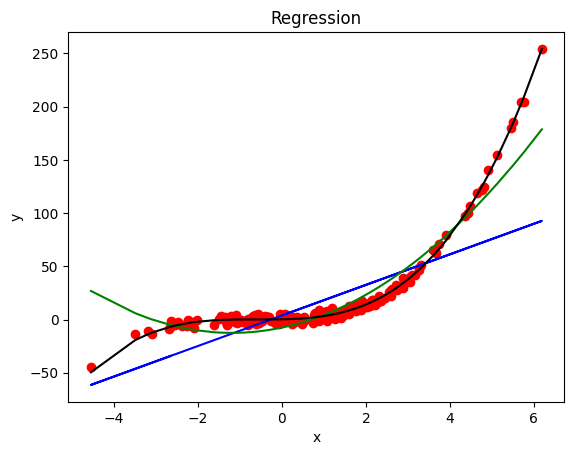

In [16]:
plt.scatter(X_val,y_val,color='red')
plt.plot(X_val,lin_reg_1.predict(X_val),color='blue')

x2,y2=zip(*sorted(zip(X_val,lin_reg_2.predict(X_poly_val2)),key=lambda x: x[0]))
plt.plot(x2,y2,color='green')

x3,y3=zip(*sorted(zip(X_val,lin_reg_3.predict(X_poly_val3)),key=lambda x: x[0]))
plt.plot(x3,y3,color='black')

plt.title('Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Evaluate the Final Performance

In [17]:
poly_regr=PolynomialFeatures(degree=3)
X_poly_test3=poly_regr.fit_transform(X_test)
lin_reg_3.score(X_poly_test3,y_test)

0.9941045953693239